In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
import matplotlib.pyplot as plt

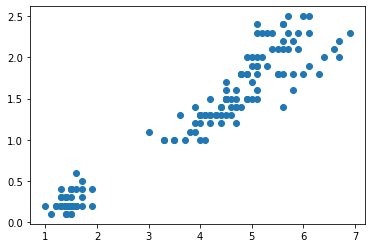

In [15]:
df['petal length (cm)'], df['petal width (cm)'plt.scatter(])

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [18]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [19]:
sse

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1588792731667124,
 0.8535683225340072,
 0.6795297632254398,
 0.5651273455703979,
 0.4858084553914369,
 0.4144569278863033]

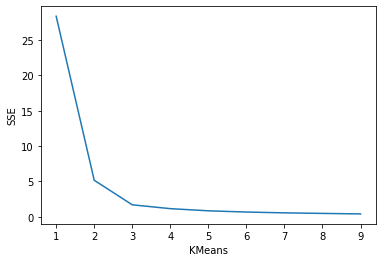

In [21]:
plt.xlabel('KMeans')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [24]:
k = KMeans(n_clusters=3)
y_predicted= k.fit_predict(df)

In [31]:
df['cluster']= y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [28]:
k.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

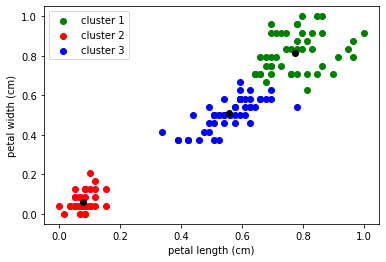

In [34]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green', label='cluster 1')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='red', label='cluster 2')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='blue', label='cluster 3')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1], color='black')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
